# 📊 Diabetes Risk Predictor - 01 Exploratory Data Analysis

---

## 📋 Table of Contents
- [1. Project Overview](#sec-project-overview)
- [2. Libraries & Setup](#sec-libraries-setup)
- [3. Data Loading & Inspection](#sec-data-loading)
- [4. Exploratory Data Analysis](#sec-eda)
  - 4.1 Target Variable Analysis
  - 4.2 Data Quality Issues
- [5. Feature Analysis](#sec-feature-analysis)
  - 5.1 Correlation Analysis
  - 5.2 Feature Distributions
  - 5.3 Outlier Analysis
- [6. Key Findings & Recommendations](#sec-key-findings)
- [7. Analysis Summary](#sec-summary)

---
<a id="sec-project-overview"></a>
## 1. 🎯 Project Overview

This dataset is originally from the **National Institute of Diabetes and Digestive and Kidney Diseases**. The objective is to diagnostically predict whether a patient has diabetes based on diagnostic measurements.

### Dataset Characteristics
- **Target Population**: Females at least 21 years old of Pima Indian heritage
- **Target Variable**: `Outcome` (1 = Diabetic, 0 = Non-diabetic)
- **Features**: Medical diagnostic measurements including glucose, blood pressure, BMI, age, etc.

### Analysis Goals
1. ✓ Understand data distribution and quality
2. ✓ Handle missing values (zeros in medical measurements)
3. ✓ Analyze feature correlations with diabetes outcome
4. ✓ Identify outliers and patterns
5. ✓ Prepare insights for model building

---
<a id="sec-libraries-setup"></a>
## 2. 🔧 Libraries & Setup

Loading necessary libraries for data manipulation, visualization, and analysis.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Configure plot styling
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

---
<a id="sec-data-loading"></a>
## 3. 📂 Data Loading & Inspection

Loading the diabetes dataset and performing initial inspection to understand structure and data quality.

In [2]:
# Load dataset
df = pd.read_csv(r"../data/diabetes.csv")

# Display first few rows
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
df.head()

Dataset shape: 768 rows, 9 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check data types and missing values
print("\n=== Data Info ===")
df.info()


print("*"*50)
print("\n=== Zeros Values ===")
print((df == 0).sum())


=== Data Info ===
<class 'pandas.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
**************************************************

=== Zeros Values ===
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374

---
<a id="sec-eda"></a>
## 4. 🔍 Exploratory Data Analysis

### 4.1 Target Variable Analysis 🎯

Examining the distribution of the outcome variable to check for class imbalance.

In [4]:
# Check class distribution
outcome_dist = df.Outcome.value_counts(normalize=True)
print("Class Distribution (proportion):")
print(outcome_dist)
print(f"\nClass balance: {outcome_dist[1]:.1%} diabetic vs {outcome_dist[0]:.1%} non-diabetic")
print("Assessment: Mild imbalance - no SMOTE required")

Class Distribution (proportion):
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Class balance: 34.9% diabetic vs 65.1% non-diabetic
Assessment: Mild imbalance - no SMOTE required


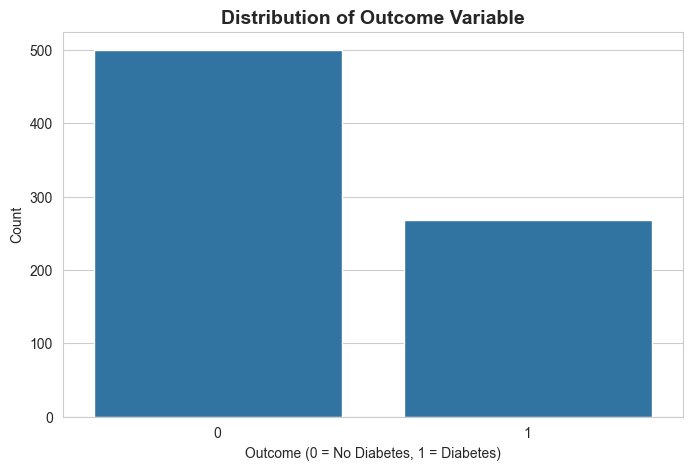

In [5]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Outcome", data=df)
plt.title("Distribution of Outcome Variable", fontsize=14, fontweight='bold')
plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
plt.ylabel("Count")
plt.show()

### 4.2 Data Quality Issues - Zero Values ⚠️

Medical measurements cannot logically be zero (e.g., Glucose, BloodPressure, BMI). These zeros represent missing data and need to be handled appropriately.

In [6]:
# Statistical summary of the dataset
print("=== Statistical Summary (Before Handling Zeros) ===")
df.describe()

=== Statistical Summary (Before Handling Zeros) ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 4.2.1 Count Zero Values in Medical Measurements

Identifying which columns contain invalid zero values.

In [7]:
# Columns that shouldn't have zero values
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

print("=== Zero Value Counts ===")
for col in cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    print(f"{col:20s}: {zero_count:3d} zeros ({zero_pct:5.1f}%)")

=== Zero Value Counts ===
Glucose             :   5 zeros (  0.7%)
BloodPressure       :  35 zeros (  4.6%)
SkinThickness       : 227 zeros ( 29.6%)
Insulin             : 374 zeros ( 48.7%)
BMI                 :  11 zeros (  1.4%)


#### 4.2.2 Impute Zero Values with Median 🔧

**Strategy**: Replace zeros with NaN, then impute using median values. Median is chosen because it's robust to outliers.

In [8]:
# Replace zeros with NaN
df[cols] = df[cols].replace(0, np.nan)

# Impute NaN values with median
print("=== Median Imputation Values ===")
for col in cols:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)
    print(f"{col:20s}: {median_value:.2f}")

print("\n=== Verification: Data After Imputation ===")
df[cols].head(10)

=== Median Imputation Values ===
Glucose             : 117.00
BloodPressure       : 72.00
SkinThickness       : 29.00
Insulin             : 125.00
BMI                 : 32.30

=== Verification: Data After Imputation ===


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
5,116.0,74.0,29.0,125.0,25.6
6,78.0,50.0,32.0,88.0,31.0
7,115.0,72.0,29.0,125.0,35.3
8,197.0,70.0,45.0,543.0,30.5
9,125.0,96.0,29.0,125.0,32.3


#### 4.2.3 Verify Data Cleaning ✅

Confirming that zero values have been successfully handled. Note: Pregnancies can naturally be zero.

In [9]:
# Statistical summary after cleaning
print("=== Statistical Summary (After Handling Zeros) ===")
df.describe()

=== Statistical Summary (After Handling Zeros) ===


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


---
<a id="sec-feature-analysis"></a>
## 5. 📈 Feature Analysis

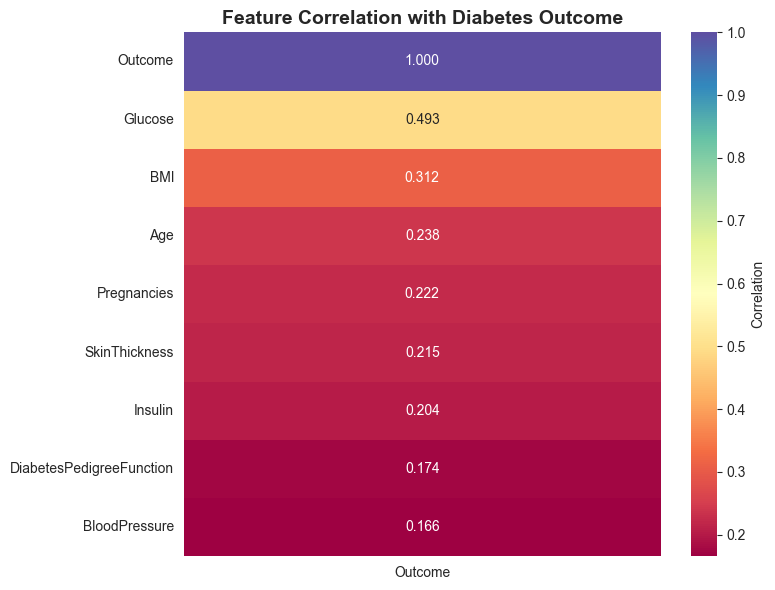


CORRELATION ANALYSIS

=== Top 4 Correlated Features ===
Glucose        0.492782
BMI            0.312038
Age            0.238356
Pregnancies    0.221898
Name: Outcome, dtype: float64


In [10]:
# Correlation with target variable
plt.figure(figsize=(8, 6))
correlations = df.corr()['Outcome'].sort_values(ascending=False)
sns.heatmap(pd.DataFrame(correlations), cmap='Spectral', annot=True, fmt='.3f', 
            cbar_kws={'label': 'Correlation'})
plt.title("Feature Correlation with Diabetes Outcome", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("CORRELATION ANALYSIS")
print("="*50)
print("\n=== Top 4 Correlated Features ===")
print(correlations[1:5])

### 5.1 Correlation Analysis 📊

Examining relationships between features and the target variable to identify important predictors.

### 5.2 Feature Distributions 📉

Analyzing the distribution of each feature to understand data spread and identify potential issues.

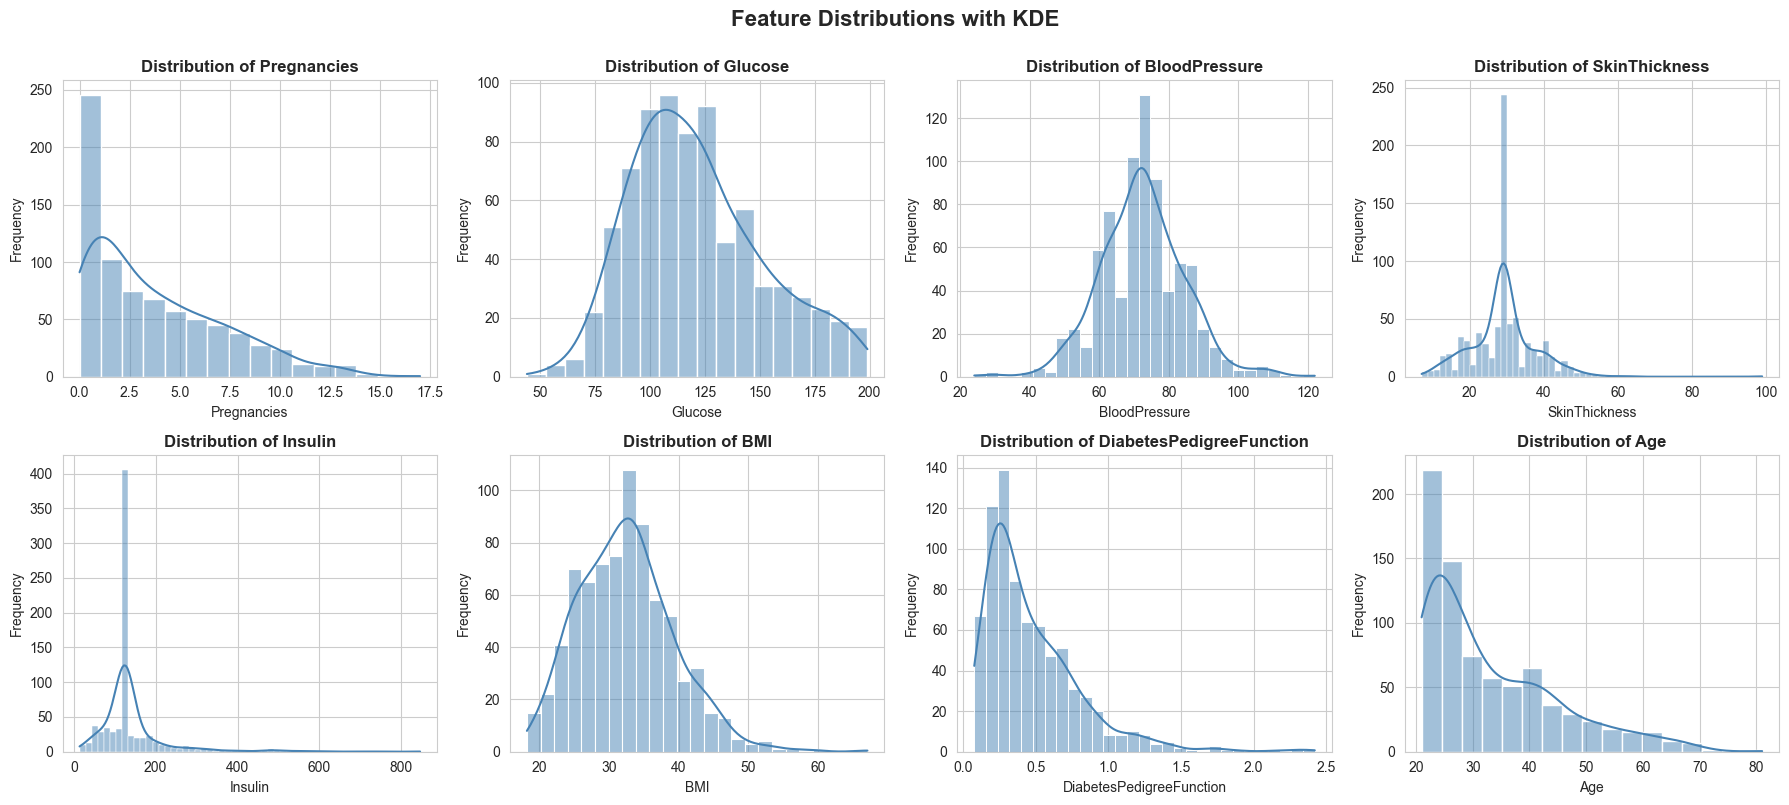

In [11]:
# Distribution plots for all features
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(18, 8))
columns = df.columns
idx = 0

for i in range(2):
    for j in range(4):
        if idx < len(columns):
            sns.histplot(df[columns[idx]], kde=True, ax=ax[i, j], color='steelblue')
            ax[i, j].set_title(f'Distribution of {columns[idx]}', fontweight='bold')
            ax[i, j].set_xlabel(columns[idx])
            ax[i, j].set_ylabel('Frequency')
            idx += 1

plt.suptitle('Feature Distributions with KDE', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

**Key Observations:**
- ✓ Most features show right-skewed distributions
- ⚠️ Presence of outliers in several features (visible in tails)
- 💡 Will Use **RobustScaler** for preprocessing as it uses median and IQR, making it robust to outliers

### 5.3 Outlier Analysis 🎯

Using boxplots to identify outliers and compare feature values between diabetic and non-diabetic groups.

C:\Users\osama\AppData\Local\Temp\ipykernel_14292\722463065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Outcome"], y=df[columns[idx]], ax=ax[i, j], palette="Set2")
C:\Users\osama\AppData\Local\Temp\ipykernel_14292\722463065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Outcome"], y=df[columns[idx]], ax=ax[i, j], palette="Set2")
C:\Users\osama\AppData\Local\Temp\ipykernel_14292\722463065.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Outcome"], y=df[columns[idx]], ax=ax[i, j], palette="Set2")
C:\Users\osam

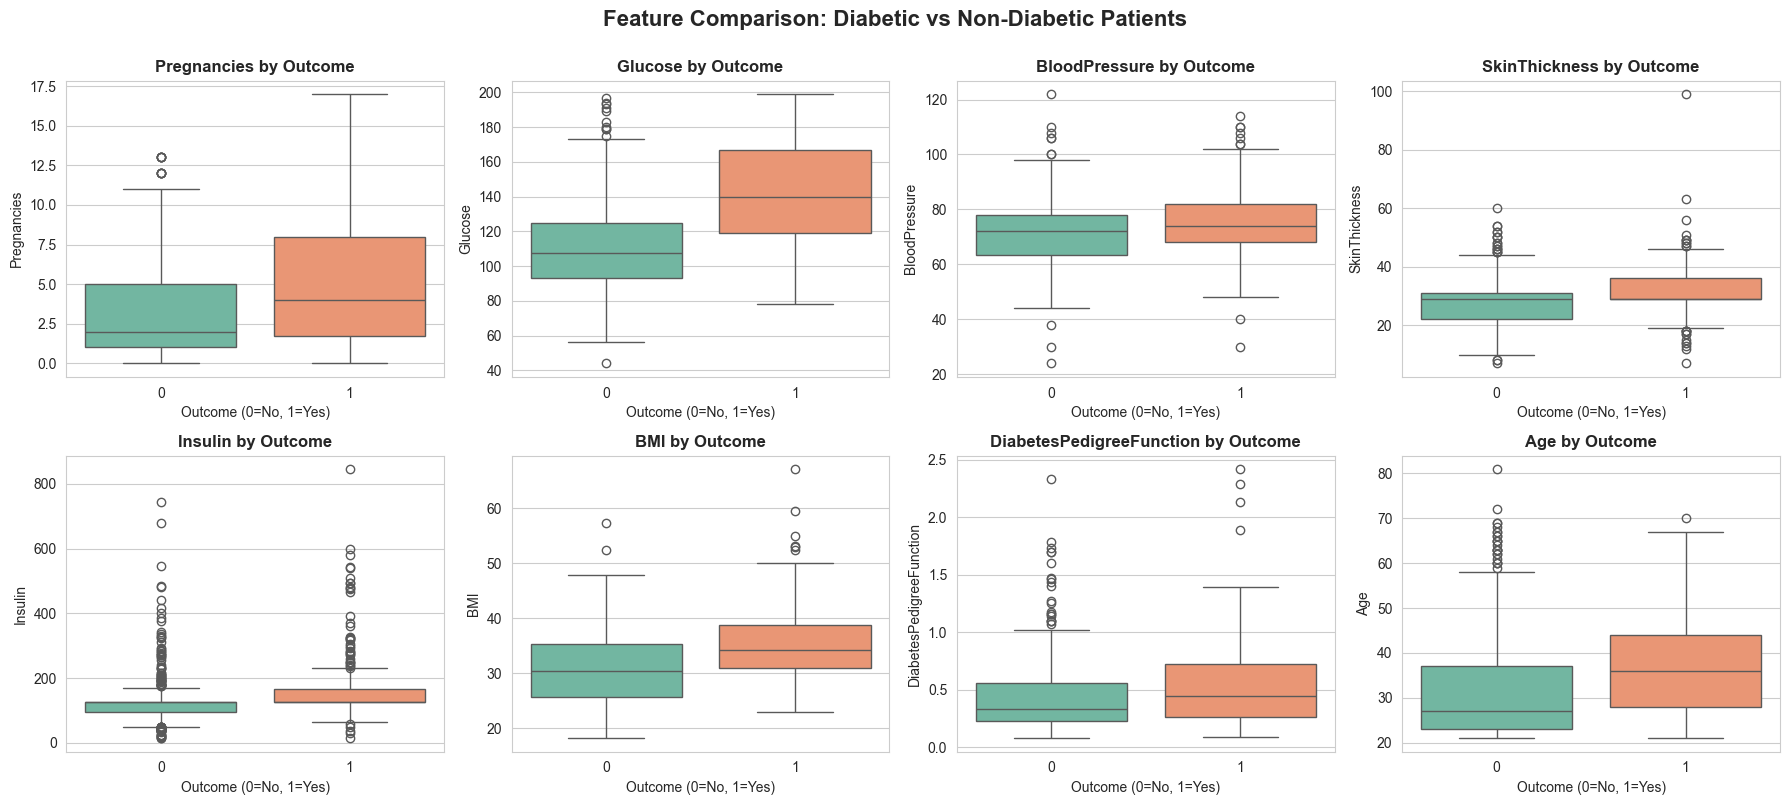

In [12]:
# Boxplots by outcome for outlier detection and group comparison
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(18, 8))
columns = df.columns
idx = 0

for i in range(2):
    for j in range(4):
        if idx < len(columns):
            sns.boxplot(x=df["Outcome"], y=df[columns[idx]], ax=ax[i, j], palette="Set2")
            ax[i, j].set_title(f'{columns[idx]} by Outcome', fontweight='bold')
            ax[i, j].set_xlabel('Outcome (0=No, 1=Yes)')
            ax[i, j].set_ylabel(columns[idx])
            idx += 1

plt.suptitle('Feature Comparison: Diabetic vs Non-Diabetic Patients', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

#### Boxplot Analysis Results:
- 🟢 **Strong Separators**: Glucose and BMI show clear separation between diabetic and non-diabetic groups
- 🟡 **Moderate Separators**: Age, Pregnancies, and Insulin show some differentiation  
- 🔴 **Weak Separators**: BloodPressure and SkinThickness exhibit high overlap, suggesting weaker predictive power
- ⚠️ **Outliers Detected**: Multiple features contain outliers that should be handled during preprocessing

- Saving Cleaned Data

In [13]:
df.to_csv("../data/clean_diabetes_data.csv")

---
<a id="sec-key-findings"></a>
## 6. 🎓 Key Findings & Recommendations

### 📊 Main Insights:

#### 1. Target Variable Balance
- Dataset has **mild class imbalance**: 65% non-diabetic, 35% diabetic
- **Action**: No resampling needed (SMOTE not required)

#### 2. Data Quality Status
- ✅ Successfully handled invalid zero values in medical measurements using median imputation
- **Impact**: Improved data reliability for modeling

#### 3. Feature Importance Ranking (by correlation with outcome)
| Rank | Feature | Correlation | Strength |
|------|---------|-------------|----------|
| 1 | **Glucose** | 0.49 | 🟢 Strongest |
| 2 | **BMI** | 0.31 | 🟢 Strong |
| 3 | **Age** | 0.24 | 🟡 Moderate |
| 4 | **Pregnancies** | 0.22 | 🟡 Moderate |
| 5 | **SkinThickness** | 0.21 | 🔴 Weak |
| 6 | **Insulin** | 0.20 | 🔴 Weak |
| 7 | **DPF** | 0.17 | 🔴 Weak |
| 8 | **BloodPressure** | 0.16 | 🔴 Weakest |

#### 4. Data Distribution Characteristics
- 📈 Right-skewed distributions in most features
- 📍 Outliers present in multiple features
- ⚠️ Strong feature overlap in BloodPressure and SkinThickness

---

### 🔧 Preprocessing Recommendations:

| Step | Action | Status | Rationale |
|------|--------|--------|-----------|
| 1 | Handle Missing Values | ✅ Done | Used median imputation |
| 2 | Feature Scaling | 🔧 Next | Use **RobustScaler** for outlier robustness |
| 3 | Outlier Treatment | Auto | RobustScaler handles naturally |
| 4 | Feature Engineering | 📋 Optional | Create polynomial features for Glucose & BMI |

---

### 📌 Next Steps:
1. ⏭️ Feature scaling with RobustScaler
2. ⏭️ Train-test split with proper validation strategy
3. ⏭️ Model development and evaluation (Logistic Regression, Random Forest, XGBoost)
4. ⏭️ Hyperparameter tuning and cross-validation
5. ⏭️ Final model evaluation and deployment

---
<a id="sec-summary"></a>
## 7. 📝 Analysis Summary

**Status**: ✅ EDA Complete

This exploratory analysis provides a solid foundation for model development with:
- Clean, imputed data ready for processing
- Clear understanding of feature importance
- Identification of preprocessing needs
- Strategic recommendations for next phases

**Prepared by**: Data Science Team  
**Date**: February 24, 2026  
**Dataset**: Pima Indians Diabetes Database